In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [3]:
df = pd.read_csv('data_cars.csv', header=None)
for i in range(len(df.columns)):
    df[i] = df[i].astype('category')
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
map5

{'high': 0, 'low': 1, 'med': 2}

In [4]:
#map catgories to values
map0 = dict( zip( df[0].cat.categories, range( len(df[0].cat.categories ))))
map1 = dict( zip( df[1].cat.categories, range( len(df[1].cat.categories ))))
map2 = dict( zip( df[2].cat.categories, range( len(df[2].cat.categories ))))
map3 = dict( zip( df[3].cat.categories, range( len(df[3].cat.categories ))))
map4 = dict( zip( df[4].cat.categories, range( len(df[4].cat.categories ))))
map5 = dict( zip( df[5].cat.categories, range( len(df[5].cat.categories ))))
map6 = dict( zip( df[6].cat.categories, range( len(df[6].cat.categories ))))
cat_cols = df.select_dtypes(['category']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes)
df = df.iloc[np.random.permutation(len(df))]
print(df.head())

      0  1  2  3  4  5  6
1661  1  1  1  1  1  0  1
680   0  2  1  0  1  0  2
1125  2  2  1  2  2  1  2
1639  1  1  0  2  2  2  2
753   0  2  3  2  0  1  2


In [5]:
df_f1 = pd.DataFrame(columns=['method']+sorted(map6, key=map6.get))
df_precision = pd.DataFrame(columns=['method']+sorted(map6, key=map6.get))
df_recall = pd.DataFrame(columns=['method']+sorted(map6, key=map6.get))

def CalcMeasures(method,y_pred,y_true,df_f1=df_f1,df_precision=df_precision,df_recall=df_recall):
    df_f1.loc[len(df_f1)] = [method]+list(f1_score(y_true,y_pred,average=None))
    df_precision.loc[len(df_precision)] = [method]+list(precision_score(y_pred,y_true,average=None))
    df_recall.loc[len(df_recall)] = [method]+list(recall_score(y_pred,y_true,average=None))
    
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values


In [6]:
cv = 10
method = 'linear support vector machine'
clf = svm.SVC(kernel='linear',C=50, gamma="auto")
y_pred = cross_val_predict(clf, X,Y, cv=cv)
CalcMeasures(method,y_pred,Y)

method = 'naive bayes'
clf = MultinomialNB()
y_pred = cross_val_predict(clf, X,Y, cv=cv)
CalcMeasures(method,y_pred,Y)

method = 'logistic regression'
clf = LogisticRegression(multi_class="auto",solver='lbfgs')
y_pred = cross_val_predict(clf, X,Y, cv=cv)
CalcMeasures(method,y_pred,Y)

method = 'k nearest neighbours'
clf = KNeighborsClassifier(weights='distance',n_neighbors=5)
y_pred = cross_val_predict(clf, X,Y, cv=cv)
CalcMeasures(method,y_pred,Y)

method = 'rbf support vector machine'
clf = svm.SVC(kernel='rbf',C=50, gamma="auto")
y_pred = cross_val_predict(clf, X,Y, cv=cv)
CalcMeasures(method,y_pred,Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no t

In [40]:
print(df_f1)

print(df_precision)

print(df_recall)

                          method       acc      good     unacc     vgood
0  linear support vector machine  0.259332  0.000000  0.846783  0.000000
1                    naive bayes  0.035443  0.000000  0.825017  0.000000
2            logistic regression  0.238908  0.000000  0.819903  0.240741
3           k nearest neighbours  0.778689  0.442105  0.949783  0.680000
4     rbf support vector machine  0.994778  0.978723  1.000000  0.992248
                          method       acc      good     unacc     vgood
0  linear support vector machine  0.171875  0.000000  0.984298  0.000000
1                    naive bayes  0.018229  0.000000  0.997521  0.000000
2            logistic regression  0.182292  0.000000  0.912397  0.200000
3           k nearest neighbours  0.742188  0.304348  0.992562  0.523077
4     rbf support vector machine  0.992188  1.000000  1.000000  0.984615
                          method       acc      good     unacc     vgood
0  linear support vector machine  0.528000  0.00000

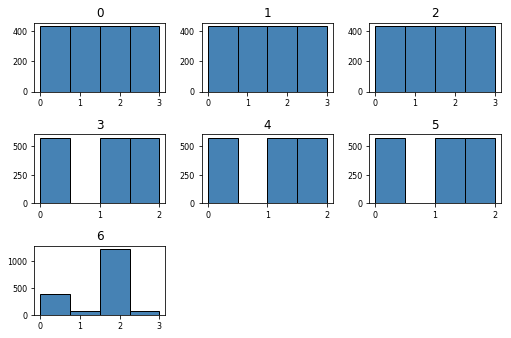

In [9]:
import matplotlib.pyplot as plt
# general distribution of values there are for all the variables
df.hist(bins=4, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

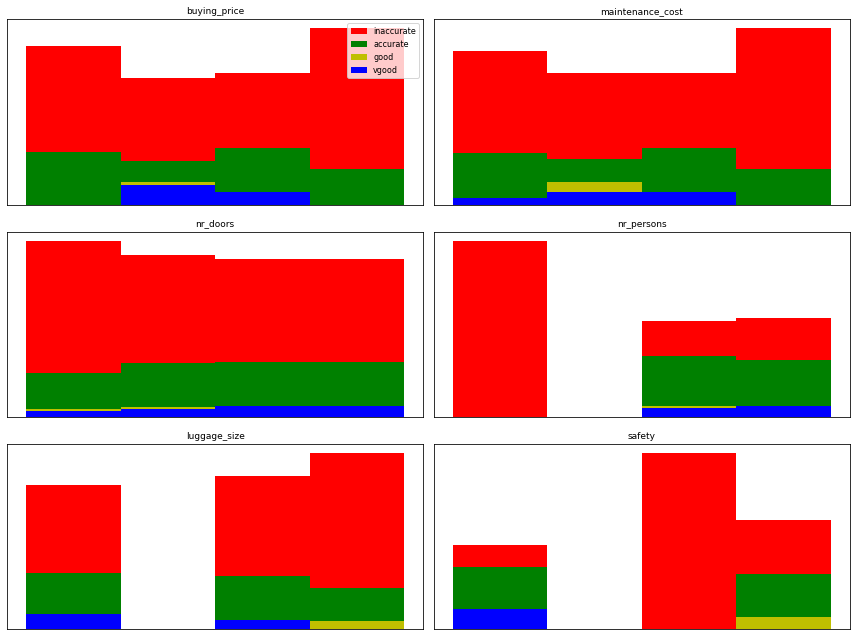

In [10]:
# get labels for targets
labels = ['buying_price', 'maintenance_cost', 'nr_doors', 'nr_persons', 'luggage_size', 'safety']

# for each target value, show variable histogram
fig,axes = plt.subplots(3,2, figsize=(12, 9)) 
inaccurate = df.loc[df[6] == map6['unacc']] 
accurate = df.loc[df[6] == map6['acc']]
good = df.loc[df[6] == map6['good']]
very_good = df.loc[df[6] == map6['vgood']]
ax=axes.ravel()# flat axes with numpy ravel
for i in range(6):
    _,bins=np.histogram(df[i],bins=4)
    ax[i].hist(inaccurate[i],bins=bins,color='r')  # red color for malignant class
    ax[i].hist(accurate[i],bins=bins,color='g')# alpha is for transparency in the overlapped region
    ax[i].hist(good[i],bins=bins,color='y')
    ax[i].hist(very_good[i],bins=bins,color='b')
    ax[i].set_title(labels[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False) # the x-axis coordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())

ax[0].legend(['inaccurate','accurate','good', 'vgood'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()